# Price Prediction for bulldozers

#### 1. Problem Definition
Predicting the price of bulldozers, given its characteristics and previous data
#### 2. Data
The data is downloaded from a [Kaggle Competition](https://www.kaggle.com/competitions/bluebook-for-bulldozers/data)

The data for this competition is split into three parts:

* <b>Train.csv</b> is the training set, which contains data through the end of 2011.
* <b>Valid.csv</b> is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* <b>Test.csv</b> is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.
#### 3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.
[Learn More](https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation)

**Note** : The goal for most regression metrics is to minimize the error. In this case, we have to minimize the RMSLE (root mean squared log error) between the actual and predicted auction prices.
#### 4. Features
The data dictonary has description about the features that can be used while building a Machine Learning Model.
 
[Data Dictonary](https://docs.google.com/spreadsheets/d/1neOipnoywYQjQVz5-eNU8kCYRXPxiU_S/edit?usp=sharing&ouid=101268153322908060081&rtpof=true&sd=true)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
train = '/home/hp/Documents/College/Coding/Machine Learning/bulldozers_price_prediction_project/data_for_bulldozers/Train.csv'
valid = '/home/hp/Documents/College/Coding/Machine Learning/bulldozers_price_prediction_project/data_for_bulldozers/Valid.csv'
test = '/home/hp/Documents/College/Coding/Machine Learning/bulldozers_price_prediction_project/data_for_bulldozers/Test.csv'
train_and_valid = '/home/hp/Documents/College/Coding/Machine Learning/bulldozers_price_prediction_project/data_for_bulldozers/TrainAndValid.csv'

In [3]:
#Importing Training and Validation sets
training_dataset = pd.read_csv(train_and_valid, low_memory=False)
validation_dataset = pd.read_csv(valid)

In [4]:
training_dataset.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1139255,26500.0,1001274,4605,121,3.0,2004,508.0,Low,12/18/2008 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1139256,21000.0,772701,1937,121,3.0,1993,11540.0,High,8/26/2004 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
7,1139261,27000.0,902002,3539,121,3.0,2001,4883.0,High,11/17/2005 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1139272,21500.0,1036251,36003,121,3.0,2008,302.0,Low,8/27/2009 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
9,1139275,65000.0,1016474,3883,121,3.0,1000,20700.0,Medium,8/9/2007 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


In [5]:
training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [6]:
training_dataset.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

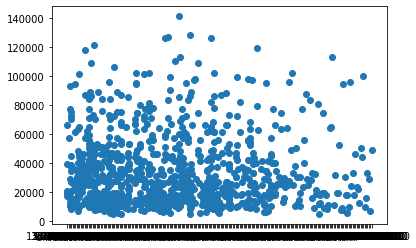

In [7]:
fig, ax = plt.subplots()
ax.scatter(training_dataset['saledate'][:1000], training_dataset['SalePrice'][:1000])

#### This is a time series data so we need to make dates look like actual dates

In [8]:
training_dataset.saledate[:1000]
#notice the dtype is an object

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

##### Whenever we are dealing with time series data, we want to enrich the time & date component as much as possible. We can do that by telling pandas which of our columns has dates in it using the `parse_date` parameter

## Parsing Dates


In [9]:
training_dataset = pd.read_csv(train_and_valid, parse_dates=['saledate'], low_memory=False)

In [10]:
training_dataset['saledate'].dtype

dtype('<M8[ns]')

In [11]:
training_dataset['saledate'][:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

In [12]:
training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

> 'datetime64[ns]' '<M8[ns]' are the same. 
They represent the date format (YY-MM-DD)

#### We'll get a better result when we plot a scatter plot between saleprice and saledate

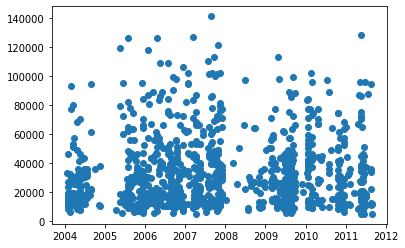

In [13]:
fig, ax = plt.subplots()
ax.scatter(training_dataset['saledate'][:1000], training_dataset['SalePrice'][:1000])

### Sort DataFrame by SaleDate
When working with time series data, it's a good practice to sort it by date


In [14]:
# Sort DataFrame in date order
training_dataset.sort_values(by = ['saledate'], inplace = True, ascending = True)
training_dataset.head(20)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN
54653,1301884,23500.0,1182999,4123,132,99.0,1976,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
81383,1379228,31000.0,1082797,7620,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
204924,1645390,11750.0,1527216,8202,132,99.0,1970,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
135376,1493279,63000.0,1363756,2759,132,99.0,1987,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
113390,1449549,13000.0,1289412,3356,132,99.0,1966,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
training_dataset['saledate'][:20]

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Making a copy of our dataset

In [16]:
training_copy = training_dataset.copy()

In [17]:
training_copy.head(20)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN
54653,1301884,23500.0,1182999,4123,132,99.0,1976,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
81383,1379228,31000.0,1082797,7620,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
204924,1645390,11750.0,1527216,8202,132,99.0,1970,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
135376,1493279,63000.0,1363756,2759,132,99.0,1987,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
113390,1449549,13000.0,1289412,3356,132,99.0,1966,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Adding datetime parameters for `saledate` column
[Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html)

In [18]:
training_dataset['saleYear'] = training_dataset['saledate'].dt.year
training_dataset['saleDay'] = training_dataset['saledate'].dt.day
training_dataset['saleMonth'] = training_dataset['saledate'].dt.month
training_dataset['saleDayOfWeek'] = training_dataset['saledate'].dt.dayofweek
training_dataset['saleDayOfYear'] = training_dataset['saledate'].dt.dayofweek

In [19]:
training_dataset.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls', 'saleYear',
       'saleDay', 'saleMonth', 'saleDayOfWeek', 'saleDayOfYear'],

In [20]:
training_dataset.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


##### Making the data numeric

One way we can turn all of our data into numbers is by converting them into pandas category <br>
[Reference]({https://pandas.pydata.org/docs/reference/api/pandas.api.types.is_string_dtype.html})

In [21]:
pd.api.types.is_string_dtype(training_dataset['UsageBand'])
#meaning - the 'UsageBand' column of the 'trainig_dataset' DataFrame is of the string type

True

In [22]:
#(column_name, column_fields/column's content)
for label, content in training_dataset.items():
    if pd.api.types.is_string_dtype(content):
        print(label)


#this will print all the column names with string values

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


#### Incase you're wondering what .items() does :
It iterates through a DataFrame in a key-value pair format <br> 
where `column name` or the `label` is the `key` <br> and `column fields` or the `content` are the `values`


In [23]:
# an example to understand .items()
random_dict = {'key1' : 'value1',
                'key2' : 'value2'}
for key, value in random_dict.items():
    print (f'The key is {key} \n The value is {value} \n\n')

The key is key1 
 The value is value1 


The key is key2 
 The value is value2 




In [24]:
#Now that we know that there are multiple columns with string values. Let's convert it into a pandas category
for label, content in training_dataset.items():
    if pd.api.types.is_string_dtype(content):
        training_dataset[label] = content.astype('category').cat.as_ordered()


In [25]:
training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   category      
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  category      
 11  fiBaseModel               412698 non-null  category      
 1

In [26]:
training_dataset['state'].cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [27]:
training_dataset['state'].cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [28]:
training_dataset['state'].value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [29]:
#checking missing data
training_dataset.isnull().sum()/len(training_dataset)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
saledate                    0.000000
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
T

### Fill Missing Values
#### Filling the Numeric Values

In [30]:
#check how many numeric values are missing in the first place
for label, content in training_dataset.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleDay
saleMonth
saleDayOfWeek
saleDayOfYear


In [31]:
#check which of these numeric columns have missing data
for label, content in training_dataset.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


Filling the missing values with its `median` and adding another column in the DataFrame to indicate that the field of that particular column was empty in the first place

In [32]:
for label, content in training_dataset.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #adding extra binary column to show whether the field was originally missing or not
            training_dataset[label + '_is_missing'] = pd.isnull(content)

            #filling the missing values with median
            training_dataset[label] = content.fillna(content.median())

In [33]:
#check if there are further null values remaining
for label, content in training_dataset.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [34]:
training_dataset.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [35]:
training_dataset.isnull().sum()/len(training_dataset)

SalesID                                0.000000
SalePrice                              0.000000
MachineID                              0.000000
ModelID                                0.000000
datasource                             0.000000
auctioneerID                           0.000000
YearMade                               0.000000
MachineHoursCurrentMeter               0.000000
UsageBand                              0.821492
saledate                               0.000000
fiModelDesc                            0.000000
fiBaseModel                            0.000000
fiSecondaryDesc                        0.340993
fiModelSeries                          0.857845
fiModelDescriptor                      0.818715
ProductSize                            0.524851
fiProductClassDesc                     0.000000
state                                  0.000000
ProductGroup                           0.000000
ProductGroupDesc                       0.000000
Drive_System                           0

#### Filling and turning categorical variables into numbers

In [36]:
#print all the variables that are not numeric
for label, content in training_dataset.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
saledate
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [37]:
#print non numeric null variables
for label, content in training_dataset.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


#### Turn categorical variables into numbers and fill missing

In [38]:
pd.Categorical(training_dataset['state']).codes         #basically gives the code for the categories made

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

The codes for the values that are missing is -1
<br>Ex:

In [39]:
#### We saw above that Usageband had a lot of missing values so lets check that to prove the above statement
pd.Categorical(training_dataset['UsageBand']).codes

#this is why we will add +1 to the codes when we are filling the missing data so our dataset has only positive values

array([-1, -1, -1, ..., -1, -1, -1], dtype=int8)

In [40]:
#turning categorical variables into numbers and fill the missing data
for label, content in training_dataset.items():
    if not pd.api.types.is_numeric_dtype(content):
        #add a binary column to indicate whether the the sample was missing or not
        training_dataset[label+'_is_missing']  = pd.isnull(content)
        #turn categories into numbers and add 1 for all the values to be positive
        training_dataset[label] = pd.Categorical(content).codes+1

In [41]:
training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 105 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(47), float64(3), int16(5), int64(10), int8(40)
memory usage: 82.3 MB


In [42]:
training_dataset.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [43]:
training_dataset.dtypes

SalesID                           int64
SalePrice                       float64
MachineID                         int64
ModelID                           int64
datasource                        int64
                                 ...   
Backhoe_Mounting_is_missing        bool
Blade_Type_is_missing              bool
Travel_Controls_is_missing         bool
Differential_Type_is_missing       bool
Steering_Controls_is_missing       bool
Length: 105, dtype: object

In [44]:
training_dataset.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 105, dtype: int64

### Fitting a Machine Learning model

In [45]:
import sklearn as sk
from sklearn.ensemble import RandomForestRegressor


In [46]:
# %%time
# # instantiate model
# model = RandomForestRegressor(n_jobs=-1, random_state=42)
# model.fit(training_dataset.drop('SalePrice', axis=1), training_dataset['SalePrice'])
# #damn takes a lot of time

In [47]:

# model.score(training_dataset.drop('SalePrice', axis=1), training_dataset['SalePrice'])

This metric doesn't hold water (meaning, it is not reliable) because we evaluated our model on the same data it was trained

##### Splitting the data

In [48]:
validation_dataset.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1222837,902859,1376,121,3,1000,0.0,NaN,1/5/2012 0:00,375L,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
1,1222839,1048320,36526,121,3,2006,4412.0,Medium,1/5/2012 0:00,TX300LC2,...,None or Unspecified,"12' 4""",None or Unspecified,Yes,Double,NaN,NaN,NaN,NaN,NaN
2,1222841,999308,4587,121,3,2000,10127.0,Medium,1/5/2012 0:00,270LC,...,None or Unspecified,"12' 4""",None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1222843,1062425,1954,121,3,1000,4682.0,Low,1/5/2012 0:00,892DLC,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
4,1222845,1032841,4701,121,3,2002,8150.0,Medium,1/4/2012 0:00,544H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


In [49]:
#we already have training and validation sets splitted for us. But this validation set doesnt have the changes we did in the training set
validation_dataset['saledate'].value_counts()


2/13/2012 0:00    1598
3/29/2012 0:00     765
2/12/2012 0:00     698
3/28/2012 0:00     584
1/28/2012 0:00     510
                  ... 
2/27/2012 0:00       1
1/1/2012 0:00        1
3/12/2012 0:00       1
4/16/2012 0:00       1
2/10/2012 0:00       1
Name: saledate, Length: 94, dtype: int64

So lets split

In [50]:
training_dataset['saleYear'].value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [51]:
len(training_dataset)

412698

In [52]:
#splitting "training dataset" which was actually the mixture of training and validation sets into training and validation
df_val = training_dataset[training_dataset['saleYear'] == 2012]
df_train = training_dataset[training_dataset['saleYear'] != 2012]
len(df_val), len(df_train)


(11573, 401125)

In [53]:
#split data into X & y
X_train, y_train = df_train.drop('SalePrice', axis=1), df_train['SalePrice']
X_valid, y_valid = df_val.drop('SalePrice', axis = 1), df_val['SalePrice']

# len(X_train), len(y_train), len(X_valid), len(y_valid)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 104), (401125,), (11573, 104), (11573,))

#### Root Mean Squared Logaritmic Error (RMSLE)
- It is the Root Mean Squared Error of the log-transformed predicted and log-transformed actual values.
- RMSLE adds 1 to both actual and predicted values before taking the natural logarithm to avoid taking the natural log of possible 0 (zero) values.
- As a result, the function can be used if actual or predicted have zero-valued elements. But this function is not appropriate if either is negative valued (that's why we converted the codes of missing values from -1 to 0 by adding 1)
- Can be written as - <br> log((pi+1)/(ai+1))


<br>Learn more about [Root Mean Squared Logaritmic Error (RMSLE)](https://hrngok.github.io/posts/metrics/#:~:text=Root%20Mean%20Squared%20Logaritmic%20Error%20(RMSLE)&text=It%20is%20the%20Root%20Mean,possible%200%20(zero)%20values.)

### Building an evaluation function

<img src = '/home/hp/Documents/College/Coding/Machine Learning/bulldozers_price_prediction_project/assets/MAE_vs_MSE.png'/>

In [57]:
#Create evaluation function (this competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score
#sklearn doesnt have any inbuilt function for RSMLE but we do have MSLE
def rsmle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_true=y_test, y_pred=y_preds))

#Creating a function to evaluate model on a few different metrics
#the idea here is that the model should perform worse on the validation data then the training data
def show_scores(model):
    '''
    We need the predicted values to evaluate the function in the first place
    '''
    y_train_preds = model.predict(X_train)
    y_valid_preds = model.predict(X_valid)

    scores = {
        'Training MAE' : mean_absolute_error(y_train, y_train_preds),
        'Valid MAE' : mean_absolute_error(y_valid, y_valid_preds),
        'Training RSMLE' : rsmle(y_train, y_train_preds),
        'Valid RSMLE' : rsmle(y_valid, y_valid_preds),
        'Training R2' : r2_score(y_train, y_train_preds),
        'Valid R2' : r2_score(y_valid, y_valid_preds)
    }
    return scores

In [59]:
#Reducing the size of our dataset for experimenting so that it takes less time
model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=10000)
model.fit(X_train,y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [60]:
show_scores(model)

{'Training MAE': 5450.67939432845,
 'Valid MAE': 7225.31708545753,
 'Training RSMLE': 0.2546547753771159,
 'Valid RSMLE': 0.29688859063040035,
 'Training R2': 0.8650349651897475,
 'Valid R2': 0.8317797813095208}

## Hyperparameter tuning with RandomizedSearchCV

In [61]:
%%time

from sklearn.model_selection import RandomizedSearchCV

rf_grid = {
    'n_estimators' : np.arange(10,100,10),
    'max_depth' : [None, 3,5,10,14],
    'min_samples_split' : np.arange(2,20,2),
    'min_samples_leaf' : np.arange(1,20,2),
    'max_features' : [0,1,'sqrt','auto'],
    'max_samples' : [10000]
}

#instantiate the RandomizedSearchCv Model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42),
param_distributions = rf_grid, 
n_iter = 5, 
cv=5,
verbose = True)

#Fitting the model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/home/hp/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hp/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hp/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomF

CPU times: user 48.7 s, sys: 9.85 s, total: 58.5 s
Wall time: 1min 19s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10, 14],
                                        'max_features': [0, 1, 'sqrt', 'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [62]:
rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 14,
 'min_samples_leaf': 17,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [63]:
#Evaluate the model
show_scores(rs_model)

{'Training MAE': 6371.431042802366,
 'Valid MAE': 8066.756497364383,
 'Training RSMLE': 0.2875918710000695,
 'Valid RSMLE': 0.3191264179805237,
 'Training R2': 0.8151659691949259,
 'Valid R2': 0.7785909619706747}

#### Improving our Hyperparameters
**Note** : These hyperparameters were found after n_iter = 100 (i.e. running the model for  100 iterations)

In [64]:
%%time

#Most ideal parameters

#Instantiating the model
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf = 1,
                                    min_samples_split = 14,
                                    max_features = 0.5,
                                    n_jobs = -1,
                                    max_samples = None,
                                    random_state = 42)
#Fitting the model
ideal_model.fit(X_train, y_train)

CPU times: user 5min 57s, sys: 1.73 s, total: 5min 59s
Wall time: 52.5 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [65]:
show_scores(ideal_model)

{'Training MAE': 2875.894546089042,
 'Valid MAE': 5986.72125618044,
 'Training RSMLE': 0.14205367811101474,
 'Valid RSMLE': 0.24825346130248424,
 'Training R2': 0.9607924251562381,
 'Valid R2': 0.8808596104368449}

The rest of the content is in 'test_dataset.ipynb'
